In [209]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [210]:
os.chdir("/Users/tanmay/Desktop/CMU/Fall 20/Data Management/HW2")
os.getcwd()

'/Users/tanmay/Desktop/CMU/Fall 20/Data Management/HW2'

In [5]:
rawData = np.loadtxt('Water_Temp_Strain.txt')

In [211]:
print(rawData)
print(len(rawData))
print(np.shape(rawData))

[[ -7.3176451    0.3724495   16.77454715]
 [ -7.23201755  -0.75437018  19.49847855]
 [ -6.47722629   1.10997522  49.87175411]
 ...
 [ -7.72165131  -1.36599656 -21.02029241]
 [ -8.08553348   1.09095295  -6.94422611]
 [ -7.66052752   4.21902384   4.80705458]]
3651
(3651, 3)


In [212]:
y = np.array(rawData[:,2])
print(y)

[ 16.77454715  19.49847855  49.87175411 ... -21.02029241  -6.94422611
   4.80705458]


In [213]:
time = np.arange(0,525744,144)
numRecords = len(time)
time = time.reshape(numRecords,1)
# print(time)
# print(numRecords)
data = np.concatenate((time,rawData), axis = 1)
print(data)

[[ 0.00000000e+00 -7.31764510e+00  3.72449496e-01  1.67745472e+01]
 [ 1.44000000e+02 -7.23201755e+00 -7.54370183e-01  1.94984785e+01]
 [ 2.88000000e+02 -6.47722629e+00  1.10997522e+00  4.98717541e+01]
 ...
 [ 5.25312000e+05 -7.72165131e+00 -1.36599656e+00 -2.10202924e+01]
 [ 5.25456000e+05 -8.08553348e+00  1.09095295e+00 -6.94422611e+00]
 [ 5.25600000e+05 -7.66052752e+00  4.21902384e+00  4.80705458e+00]]


In [214]:
A = np.array([time.reshape(numRecords,),np.ones(numRecords),rawData[:,1],rawData[:,0]])
A = np.transpose(A)
print(A)

[[ 0.00000000e+00  1.00000000e+00  3.72449496e-01 -7.31764510e+00]
 [ 1.44000000e+02  1.00000000e+00 -7.54370183e-01 -7.23201755e+00]
 [ 2.88000000e+02  1.00000000e+00  1.10997522e+00 -6.47722629e+00]
 ...
 [ 5.25312000e+05  1.00000000e+00 -1.36599656e+00 -7.72165131e+00]
 [ 5.25456000e+05  1.00000000e+00  1.09095295e+00 -8.08553348e+00]
 [ 5.25600000e+05  1.00000000e+00  4.21902384e+00 -7.66052752e+00]]


In [215]:
A_pi = np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)),np.transpose(A))
print(A_pi)

[[-5.72246362e-09 -5.92761032e-09 -4.35612435e-09 ...  3.58900967e-09
   3.80333804e-09  5.28878534e-09]
 [ 4.77184082e-03  4.75541779e-03  8.84427677e-03 ...  4.50579808e-03
   3.74107659e-03  6.79035123e-03]
 [-7.69957363e-05 -8.40679412e-05 -1.83144113e-05 ...  3.12590821e-05
   3.61504349e-05  9.58164921e-05]
 [ 2.11295861e-04  1.94475409e-04  7.54523785e-04 ...  5.84621894e-04
   5.16838580e-04  9.57331026e-04]]


In [216]:
w = np.matmul(A_pi,y)
print(w)

[-4.29842638e-04 -4.39502381e+02  1.44327434e+00 -5.31572336e+01]


In [217]:
q_3000 = np.matmul(A[3000],w)
print(q_3000)

-140.8540250773674


In [218]:
time_5y = 2628000
q_5y = np.matmul(np.array([time_5y,1]),w[:2])
print(q_5y)

-1569.1288341219895


[ -49.97906389  -56.21899512  -93.7127461  ... -256.81376187 -233.98663774
 -252.12601161]
(3651,)
[ 66.75361104  75.71747367 143.58450021 ... 235.79346946 227.04241163
 256.93306619]
Mean Noise 2.765103037436183e-13
Standard Dev. 3293.501826329708


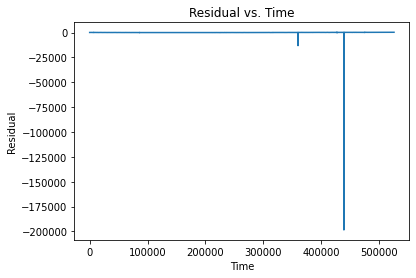

In [219]:
Aw = np.matmul(A,w)
print(Aw)
print(np.shape(Aw))

n = y - Aw
print(n)

n_mean = np.mean(n)
print('Mean Noise',n_mean)

n_std = np.std(n)
print('Standard Dev.',n_std)



plt.plot(time,n)   
# naming the x axis 
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('Residual') 
# giving a title to my graph 
plt.title('Residual vs. Time') 
# function to show the plot 
plt.show()

In [220]:
outliers = []
newData = []
for i in range(numRecords):
    if n[i] < n_mean-3*n_std or n[i] > n_mean+3*n_std:
        outliers.append([i,n[i]])
    else:
        newData.append(data[i])

print(outliers)
newData = np.array(newData)
print('Revised Length:',len(newData))



[[2499, -13168.868656736147], [3049, -198470.6856174975]]
Revised Length: 3649


[20.23785022 18.39997988 20.81961547 ... -3.25019387  0.85856366
  5.49088159]
(3649,)
[ -3.46330307   1.09849867  29.05213863 ... -17.77009854  -7.80278977
  -0.68382701]
Mean Noise -3.6220738658319473e-13
Standard Dev. 14.00811564841312


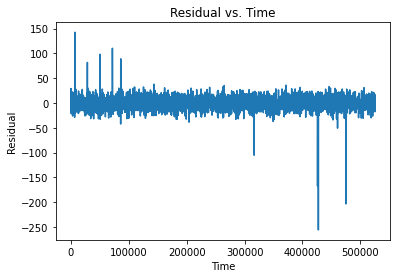

In [221]:
newA = np.array([newData[:,0],np.ones(len(newData)),newData[:,2],newData[:,1]])
newA = np.transpose(newA)
newA_pi = np.matmul(np.linalg.inv(np.matmul(np.transpose(newA),newA)),np.transpose(newA))
newy = newData[:,3]
neww = np.matmul(newA_pi,newy)
newAw = np.matmul(newA,neww)
print(newAw)
print(np.shape(newAw))

newn = newy - newAw
print(newn)

newn_mean = np.mean(newn)
print('Mean Noise',newn_mean)

newn_std = np.std(newn)
print('Standard Dev.',newn_std)



plt.plot(newData[:,0],newn)   
# naming the x axis 
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('Residual') 
# giving a title to my graph 
plt.title('Residual vs. Time') 
# function to show the plot 
plt.show()

In [222]:
newData2 = []
for i in range(len(newData)):
    if newn[i] < newn_mean-3*newn_std or newn[i] > newn_mean+3*newn_std:
        outliers.append([i,newn[i]])
    else:
        newData2.append(newData[i])

print(outliers)
newData2 = np.array(newData2)
print(len(newData2))

[[2499, -13168.868656736147], [3049, -198470.6856174975], [49, 142.53841981268812], [199, 81.75196921507109], [349, 98.12535213657785], [499, 110.26025206343485], [598, -42.41516132727348], [599, 88.91933667113773], [2199, -105.29767309195682], [2958, -167.3972164909986], [2968, -255.84567737022493], [3197, -50.75136840622547], [3297, -203.48978293662088]]
3638


[19.31054062 17.47101344 19.65182788 ... -2.74947556  1.41194327
  5.87092533]
(3638,)
[ -2.53599346   2.02746511  30.21992623 ... -18.27081685  -8.35616938
  -1.06387076]
Mean Noise 2.017175749018778e-13
Standard Dev. 11.818816366872271


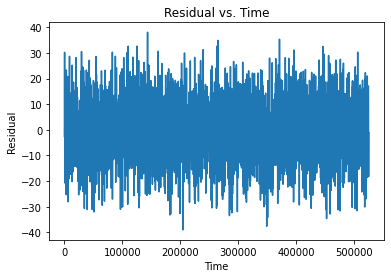

In [223]:
newA = np.array([newData2[:,0],np.ones(len(newData2)),newData2[:,2],newData2[:,1]])
newA = np.transpose(newA)
newA_pi = np.matmul(np.linalg.inv(np.matmul(np.transpose(newA),newA)),np.transpose(newA))
newy = newData2[:,3]
neww = np.matmul(newA_pi,newy)
newAw = np.matmul(newA,neww)
print(newAw)
print(np.shape(newAw))

newn = newy - newAw
print(newn)

newn_mean = np.mean(newn)
print('Mean Noise',newn_mean)

newn_std = np.std(newn)
print('Standard Dev.',newn_std)



plt.plot(newData2[:,0],newn)   
# naming the x axis 
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('Residual') 
# giving a title to my graph 
plt.title('Residual vs. Time') 
# function to show the plot 
plt.show()

In [225]:
newData3 = []
for i in range(len(newData2)):
    if newn[i] < newn_mean-3*newn_std or newn[i] > newn_mean+3*newn_std:
        outliers.append([i,newn[i]])
    else:
        newData3.append(newData2[i])

print('Outliers:',outliers)
newData3 = np.array(newData3)
print('Revised Length:',len(newData3))

Outliers: [[2499, -13168.868656736147], [3049, -198470.6856174975], [49, 142.53841981268812], [199, 81.75196921507109], [349, 98.12535213657785], [499, 110.26025206343485], [598, -42.41516132727348], [599, 88.91933667113773], [2199, -105.29767309195682], [2958, -167.3972164909986], [2968, -255.84567737022493], [3197, -50.75136840622547], [3297, -203.48978293662088], [991, 38.06700669034824], [1413, -39.05007389459015], [2419, -37.626978393744075], [991, 38.06700669034824], [1413, -39.05007389459015], [2419, -37.626978393744075]]
Revised Length: 3635


In [176]:
print(neww)

[-3.75975974e-05  1.14879353e+01  1.55176808e+00 -9.86864597e-01]


In [226]:
newq_3000 = np.matmul(newA[3000],neww)
print('New q_3000 value: ',newq_3000)

time_5y = 2628000
newq_5y = np.matmul(np.array([time_5y,1]),neww[:2])
print('New q_5y value: ',newq_5y)

New q_3000 value:  6.130799045937696
New q_5y value:  -86.93648543242917


In [248]:
data_noTemp = np.array([data[:,0],data[:,1],data[:,3]])
data_noTemp = np.transpose(data_noTemp)
# print(data_noTemp)

y_noTemp = data_noTemp[:,2]
y_noTemp = y_noTemp.reshape(numRecords,1)
print(np.shape(y_noTemp))

A_noTemp = np.array([data_noTemp[:,0],np.ones(numRecords),data_noTemp[:,1]])
A = np.transpose(A_noTemp)
# print(A)

A_pi_noTemp = np.matmul(np.linalg.inv(np.matmul(np.transpose(A_noTemp),A_noTemp)),np.transpose(A_noTemp))
print(np.shape(A_pi_noTemp))


(3651, 1)
(3651, 3)


In [253]:
w_noTemp = np.matmul(np.transpose(A_pi_noTemp),y_noTemp)
print(w_noTemp)

# newA = np.array([newData3[:,0],np.ones(len(newData3)),newData3[:,1]])
# newA = np.transpose(newA)
# newA_pi = np.matmul(np.linalg.inv(np.matmul(np.transpose(newA),newA)),np.transpose(newA))
# newy = newData3[:,2]
# neww = np.matmul(newA_pi,newy)
# print(neww)
# newAw = np.matmul(newA,neww)
# print(newAw)

# newq_3000_noTemp = np.matmul(newA[3000],neww)
# print(newq_3000_noTemp,newq_3000)

# time_5y = 2628000
# newq_5y_noTemp = np.matmul(np.array([time_5y,1]),neww[:2])
# print(newq_5y_noTemp,newq_5y)

[[-1.32313520e+07]
 [ 4.23031636e+02]
 [ 5.47048926e+02]]
